In [1]:
from platform import python_version
print('A versão do Python usada neste notebook foi', python_version())

A versão do Python usada neste notebook foi 3.9.12


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [4]:
#Verificando se há valores faltantes

df.isna().sum()

# Não há valores NA

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

In [5]:
# Verificando valores duplicados

# Duplicidade significa dois registros exatamente iguais (incluindo a coluna de ID)

df.duplicated().sum()

# Não há registros (linhas) duplicadas

0

In [6]:
# Variáveis numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'compras_anteriores', 
        'desconto', 
        'custo_produto', 
        'peso_gramas']

In [7]:
# Variáveis categóricas
cats = ['modo_envio', 
        'prioridade_produto', 
        'genero',
        'corredor_armazem']

In [8]:
# Variável target
target = ['entregue_no_prazo'] 

In [9]:
# Detectando valores outliers

#Tamanho do df antes de remover registros



In [10]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,compras_anteriores,desconto,custo_produto,peso_gramas
0,4,2,3,44,177,1233
1,4,5,2,59,216,3088
2,2,2,4,48,183,3374
3,3,3,4,10,176,1177
4,2,2,3,46,184,2484


In [11]:
# Antes de analisar todas as variáveis númericas de uma vez vamos olhar para a variável desconto:
df.desconto.mean()

13.372545454545454

In [12]:
df['desconto'].std()

16.20494287359407

<AxesSubplot:>

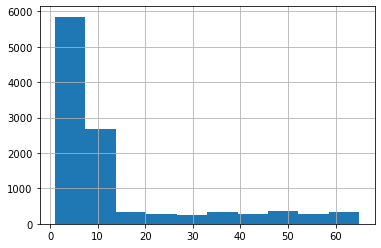

In [13]:
df.desconto.hist()

In [14]:
# Ao observar o histograma acima vemos que a maioria dos produtos teve desconto abaixo da média (<13),
# porém observamos também valores acima da média (descontos de mais de 60)
# Isso são outliers!

In [15]:
#Por definição estatística um valor outlier está acima (abaixo) do valor superior (inferior)
limite_superior = df.desconto.mean() + 3*df.desconto.std()
limite_inferior = df.desconto.mean() - 3*df.desconto.std()

print(limite_superior,
        limite_inferior)

61.987374075327665 -35.24228316623676


In [16]:
# Listando os outliers

df_outliers_desconto = df[(df['desconto'] <= limite_inferior) | (df['desconto'] >= limite_superior)]
df_outliers_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [17]:
#Removendo os outliers

df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [18]:
len(df)

10819

In [22]:
# Lidando com os outliers das outras variávieis

registros = np.array([True]*len(df))

In [23]:
type(registros)

numpy.ndarray

In [24]:
#Contagem dos valores True
np.count_nonzero(registros ==True)

10819

In [25]:
# Colunas numéricas (sem a variável desconto)

nums2 = ['numero_chamadas_cliente', 
         'avaliacao_cliente', 
         'compras_anteriores', 
         'custo_produto', 
         'peso_gramas']

In [28]:
# Fazendo um looping para cada variável numérica

for col in nums2:
    
    #Calcula o z-score absoluto:
    zscore = abs(stats.zscore(df[col]))
    
    #Mantém os valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [29]:
np.count_nonzero(registros == True)

10643

In [30]:
np.count_nonzero(registros == False) #outliers

176

In [31]:
#Removendo os outliers
df = df[registros]
len(df)

10643

In [32]:
# Desbalanceamento da variável target



In [33]:
# #Fazendo a contagem:

df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

In [34]:
# Podemos observar que que desbalanceamento não é tão agudo.
#Vale salientar que o tratamento do desbalanceamento deve ser feito nos dados de teste.
# Neste estudo não iremos nos preocupar com isso no momento.

### **Engenharia de Atributos (feature engineering)**

In [36]:
#Feature selection

# Aqui tomamos as decisões sobre quais variáveis serão usadas na Engenharia de Atributos.

In [37]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [39]:
# Analisando a correlação entre as variáveis

df.corr()

/tmp/ipykernel_92348/982178424.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


/tmp/ipykernel_92348/3678587213.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt= '.2f');


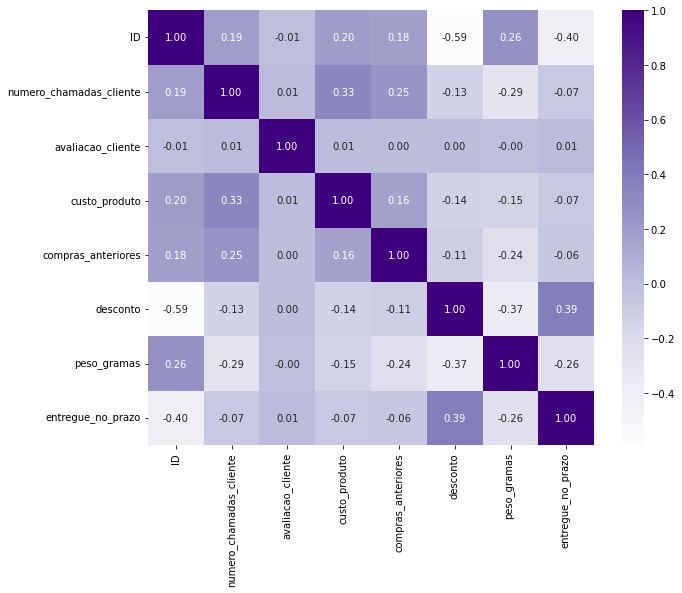

In [42]:
# É mais proveitoso usar um mapa de calor nesses casos

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt= '.2f');

In [43]:
# Decisão: variáveis que tiverem correlação com a variável target menor que +/- 0.05 serão descartadas. 
# Assim como a variáel ID que não traz nenhuma informação relevante.

# Variáveis escolhidas: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.



In [44]:
# Variáveis categoricas

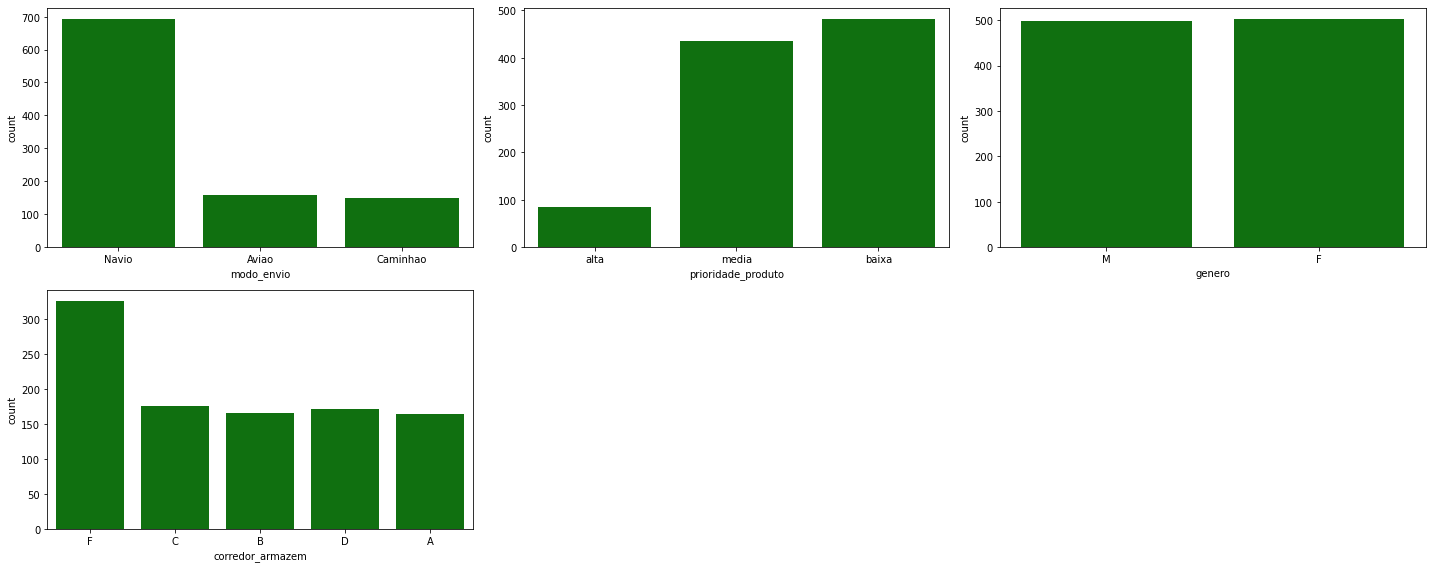

In [47]:
df_amostra = df.sample(1000, random_state=42)

plt.figure(figsize=(20, 8))

for i in range(0, len(cats)):
    
    plt.subplot(2,3, i+1)
    sns.countplot(x = df_amostra[cats[i]], color = 'green', orient='v')
    plt.tight_layout()
    

In [48]:
#Podemos observar nos gráficos acima que a variável gênero possui contagens muito próximas.
# Logo espera-se que essa variável não cause impacto no modelo final.
# Portanto vamos desconsiderar essa variável para nossa análise.


### Feature Extraction

In [49]:
#Criando uma cópia do df

df_eng = df.copy()

In [51]:
df.shape

(10643, 12)

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [52]:
df_eng['prioridade_produto'].value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [53]:
#Vamos criar a nova variável performance_prioridade_envio e preencher com NAN usando o Numpy

df_eng['performance_prioridade_envio'] = np.nan

In [57]:
#Aplicando a regra de negócio estabelecida para a criação da nova variável.

df_eng['performance_prioridade_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico',
        np.where(
                (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático',
        np.where(
                (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável',
                'Não Houve Atraso')))
        

In [58]:
df_eng['performance_prioridade_envio'].value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [59]:
df_eng.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso


In [61]:
# Agora vamos agrupar os dados para análise:

df_grupo1 = df_eng.groupby(['performance_prioridade_envio', 'entregue_no_prazo']).agg({'prioridade_produto':['count']}).reset_index()

df_grupo1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [62]:
#Ajustando os nomes das colunas:

df_grupo1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_grupo1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [65]:
# Fazendo um pivot na tabela (transformando linha em coluna)

df_grupo1 = pd.pivot_table(df_grupo1,
                          index= 'performance_prioridade_envio',
                          columns = 'entregue_no_prazo',
                          values = 'contagem').reset_index()
df_grupo1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [66]:
#Ajustando novamente os nomes das colunas:
df_grupo1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_grupo1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [68]:
#Seria interessante juntar as colunas Total Atraso e Total no Prazo em uma só.
# Pois a coluna Status do Envio já está identificando a coluna.
#Mas primeiro vamos substituir os valores NaN por zeros!!

df_grupo1['Total Atraso'] = df_grupo1['Total Atraso'].replace(np.nan, 0)
df_grupo1['Total no Prazo'] = df_grupo1['Total no Prazo'].replace(np.nan, 0)
df_grupo1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [69]:
# Concatenando as duas colunas!

df_grupo1['Total'] = df_grupo1['Total Atraso'] + df_grupo1['Total no Prazo']

df_grupo1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [71]:
#Pode agora deletar as duas outras colunas usadas para gerar a terceira

df_grupo1.drop(df_grupo1.columns[[1,2]], axis=1, inplace=True)
df_grupo1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


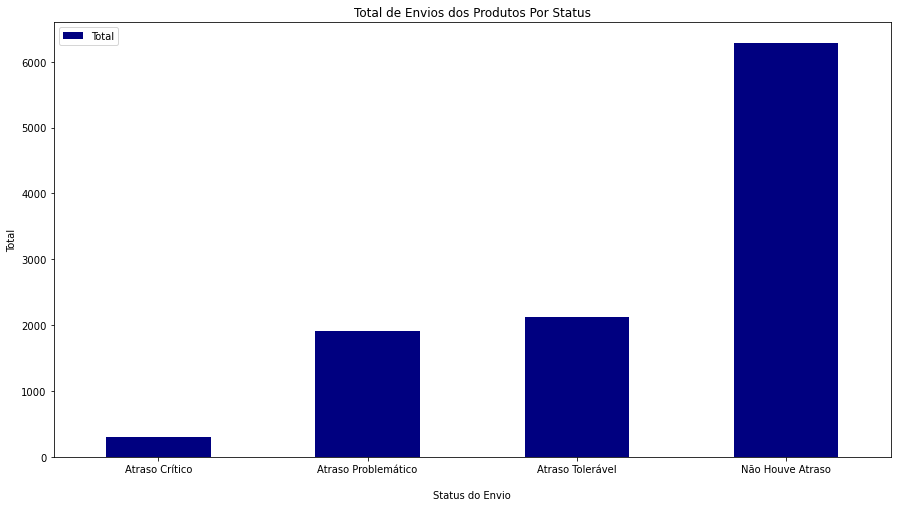

In [81]:
# Fazendo o plot

df_grupo1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(15,8))
plt.xticks(rotation = 0);

In [82]:
# Finalmente respondendo a pergunta: Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

# Podemos observar pelo gráfico acima que eles não tem a mesma proporção. Dependendo da categoria da prioridade
# produto ele pode estar em uma categoria de atraso diferente.

### 2- Performance de Envio do Produto Por Prioridade de Envio e Modo de Envio

O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso no envio, o atraso é crítico por Navio.
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso no envio, o atraso é problemático por Navio.
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso no envio, o atraso é tolerável por Navio.
- Se a prioridade do produto era alta, o modo de envio era Aviao e houve atraso no envio, o atraso é crítico por Aviao.
- Se a prioridade do produto era média, o modo de envio era Aviao e houve atraso no envio, o atraso é problemático por Aviao.
- Se a prioridade do produto era baixa, o modo de envio era Aviao e houve atraso no envio, o atraso é tolerável por Aviao.
- Se a prioridade do produto era alta, o modo de envio era Caminhao e houve atraso no envio, o atraso é crítico por Caminhao.
- Se a prioridade do produto era média, o modo de envio era Caminhao e houve atraso no envio, o atraso é problemático por Caminhao.
- Se a prioridade do produto era baixa, o modo de envio era Caminhao e houve atraso no envio, o atraso é tolerável por Caminhao.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [83]:
df_eng.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [84]:
df_eng['performance_modo_envio'] = np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Navio",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Navio", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Aviao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Aviao", 
    np.where(
        (df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico na Entrega Por Caminhao", 
    np.where(
        (df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Problemático na Entrega Por Caminhao",
    np.where(
        (df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Tolerável na Entrega Por Caminhao", 
    "Não Houve Atraso")))))))))

In [85]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso


In [86]:
df_eng.performance_modo_envio.value_counts()
#Não houve valores NaN, portanto nossa regra de negócio funcionou.

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [87]:
#Utilizamos a mesma contagem do item anterior.

df_grupo2 = df_eng.groupby(['performance_modo_envio',
                           'entregue_no_prazo']).agg({'prioridade_produto':['count']}).reset_index()
df_grupo2.head()

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310


In [89]:
#Ajustando os nomes das colunas

df_grupo2.columns = ['performance_modo_envio', 'entregue_no_prazo', 'contagem']
df_grupo2.head()

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico na Entrega Por Aviao,0,65
1,Atraso Crítico na Entrega Por Caminhao,0,51
2,Atraso Crítico na Entrega Por Navio,0,194
3,Atraso Problemático na Entrega Por Aviao,0,300
4,Atraso Problemático na Entrega Por Caminhao,0,310


In [90]:
#Fazendo o pivot

df_grupo2 = pd.pivot_table(df_grupo2,
                          index='performance_modo_envio',
                          columns= 'entregue_no_prazo',
                          values = 'contagem').reset_index()

df_grupo2.head()

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN


In [91]:
#Novamente renomeando colunas

df_grupo2.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_grupo2.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,NaN
1,Atraso Crítico na Entrega Por Caminhao,51.0,NaN
2,Atraso Crítico na Entrega Por Navio,194.0,NaN
3,Atraso Problemático na Entrega Por Aviao,300.0,NaN
4,Atraso Problemático na Entrega Por Caminhao,310.0,NaN


In [92]:
df_grupo2['Total Atraso'] = df_grupo2['Total Atraso'].replace(np.nan, 0 )
df_grupo2['Total no Prazo'] = df_grupo2['Total no Prazo'].replace(np.nan, 0 )

df_grupo2.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico na Entrega Por Aviao,65.0,0.0
1,Atraso Crítico na Entrega Por Caminhao,51.0,0.0
2,Atraso Crítico na Entrega Por Navio,194.0,0.0
3,Atraso Problemático na Entrega Por Aviao,300.0,0.0
4,Atraso Problemático na Entrega Por Caminhao,310.0,0.0


In [103]:
#Concatenando as colunas

df_grupo2['Total'] = df_grupo2['Total Atraso'] + df_grupo2['Total no Prazo']

df_grupo2.head(10)

KeyError: 'Total Atraso'

In [102]:
#Eliminando as duas colunas 

df_grupo2.drop(df_grupo2.columns[[1,2]], axis=1, inplace= True)
df_grupo2.head()

IndexError: index 2 is out of bounds for axis 0 with size 2

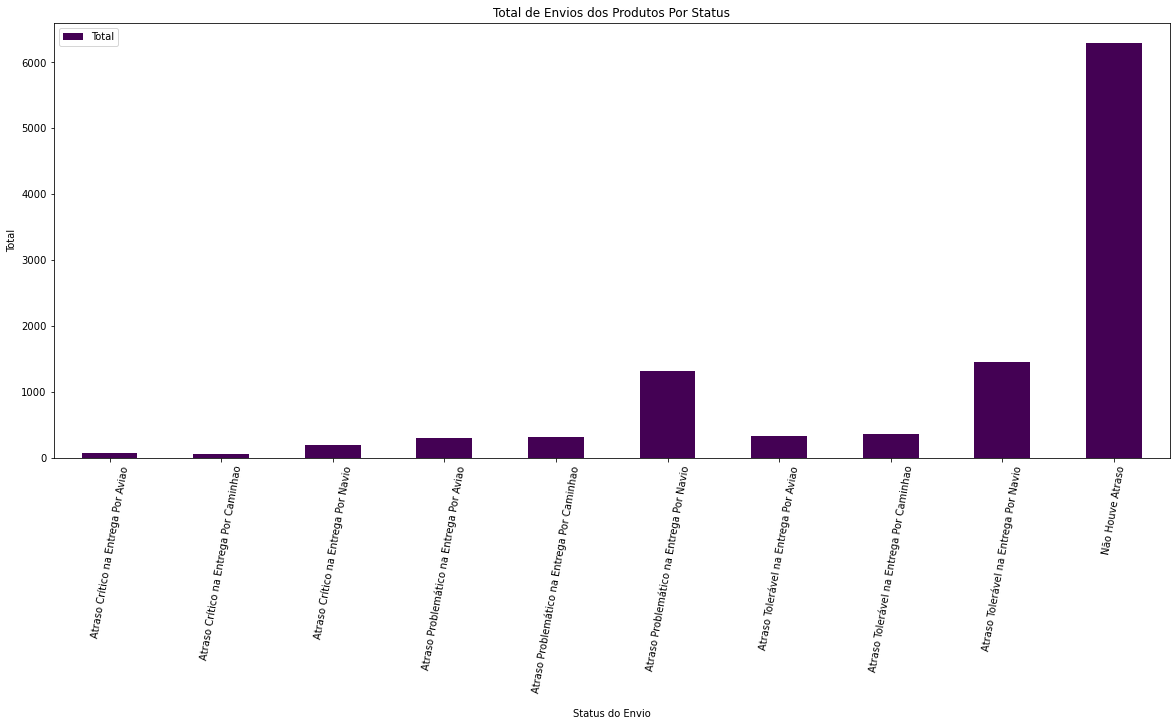

In [98]:
# Por fim fazemos o plot:

df_grupo2.set_index('Status do Envio').plot(kind = 'bar',
                                           
                                           title = 'Total de Envios dos Produtos Por Status',
                                           ylabel = 'Total', 
                                           xlabel = '\nStatus do Envio',
                                           colormap = 'viridis',
                                           figsize = (20,8))

plt.xticks(rotation = 80);


In [104]:
# Podemos observar que há uma discrepância das variáveis 'Atraso Problemático na Entrega Por Navio', 
# 'Atraso Tolerável na Entrega Por Navio' para com as outras variáveis.

# Logo envio por navio tem uma relação no atraso dos produtos.

# Portanto respondemos a pergunta: O modo de envio dos produtos associado à proridade de envio dos produtos, tem impacto no atraso dos produtos?

# Sim há uma relação entre modo envio e atraso dos produtos.

### 3- Performance de Envio dos Produtos Considerando os Descontos

Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

Criaremos duas novas variáveis com base na seguinte regra de negócio:

**Variável 1 - faixa_desconto**

- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - performance_faixa_desconto**

- Se a faixa de desconto foi acima ou igual à média e houve atraso na entrega = "Atraso na Entrega com Desconto Acima da Média"

- Se a faixa de desconto foi acima ou igual à e não houve atraso na entrega = "Entrega no Prazo com Desconto Acima da Média"

- Se a faixa de desconto foi abaixo da média e houve atraso na entrega = "Atraso na Entrega com Desconto Abaixo da Média"

- Se a faixa de desconto foi abaixo da média e não houve atraso na entrega = "Entrega no Prazo com Desconto Abaixo da Média"

In [105]:
df_eng['desconto'].mean()
#Podemos observar como foi importante tratar os valores outliers.

12.528046603401297

In [106]:
df_eng['Faixa de Desconto'] = np.where(df_eng['desconto'] >= 12, 'Desconto acima da média', 'Desconto abaixo da média')
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,Faixa de Desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto abaixo da média
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média


In [107]:
df_eng['Faixa de Desconto'].value_counts()

Desconto abaixo da média    8269
Desconto acima da média     2374
Name: Faixa de Desconto, dtype: int64

In [115]:
# Criando a outra variável:

df_eng['performance_faixa_desconto'] = np.where(
    (df_eng['Faixa de Desconto'] == 'Desconto acima da média') &(df_eng['entregue_no_prazo'] == 0),'Atraso na Entrega com Desconto Acima da Media',
    
    np.where(
        (df_eng['Faixa de Desconto'] == 'Desconto abaixo da média') & (df_eng['entregue_no_prazo'] == 0), "Atraso na Entrega com Desconto Abaixo da Media",
    np.where(
        (df_eng['Faixa de Desconto'] == 'Desconto acima da média') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Acima da Media",
    np.where(
        (df_eng['Faixa de Desconto'] == 'Desconto abaixo da média') & (df_eng['entregue_no_prazo'] == 1), "Entrega no Prazo com Desconto Abaixo da Media",
   "NA"))))

In [116]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,Faixa de Desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto abaixo da média,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto acima da média,Entrega no Prazo com Desconto Acima da Media


In [117]:
df_eng['performance_faixa_desconto'].value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [118]:
#Fazendo a análise

df_grupo3 = df_eng.groupby(['performance_faixa_desconto', 'entregue_no_prazo']).agg(
                            {'ID':['count']}).reset_index()

df_grupo3.head()

,performance_faixa_desconto,entregue_no_prazo,ID
,,,count
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [119]:
df_grupo3.columns = ['performance_faixa_desconto', 'entregue_no_prazo', 'contagem']
df_grupo3.head()

,performance_faixa_desconto,entregue_no_prazo,contagem
0,Atraso na Entrega com Desconto Abaixo da Media,0,4361
1,Entrega no Prazo com Desconto Abaixo da Media,1,3908
2,Entrega no Prazo com Desconto Acima da Media,1,2374


In [120]:
df_grupo3 = pd.pivot_table(df_grupo3,
                          index = 'performance_faixa_desconto',
                          columns = 'entregue_no_prazo',
                          values = 'contagem').reset_index()

df_grupo3.head()

entregue_no_prazo,performance_faixa_desconto,0,1
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [121]:
df_grupo3.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_grupo3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,NaN
1,Entrega no Prazo com Desconto Abaixo da Media,NaN,3908.0
2,Entrega no Prazo com Desconto Acima da Media,NaN,2374.0


In [122]:
df_grupo3['Total Atraso'] = df_grupo3['Total Atraso'].replace(np.nan, 0)
df_grupo3['Total no Prazo'] = df_grupo3['Total no Prazo'].replace(np.nan, 0)
df_grupo3.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0,0.0
1,Entrega no Prazo com Desconto Abaixo da Media,0.0,3908.0
2,Entrega no Prazo com Desconto Acima da Media,0.0,2374.0


In [123]:
df_grupo3['Total'] = df_grupo3['Total Atraso'] + df_grupo3['Total no Prazo']
df_grupo3.drop(df_grupo3.columns[[1,2]], axis=1, inplace=True)
df_grupo3.head()

,Status do Envio,Total
0,Atraso na Entrega com Desconto Abaixo da Media,4361.0
1,Entrega no Prazo com Desconto Abaixo da Media,3908.0
2,Entrega no Prazo com Desconto Acima da Media,2374.0


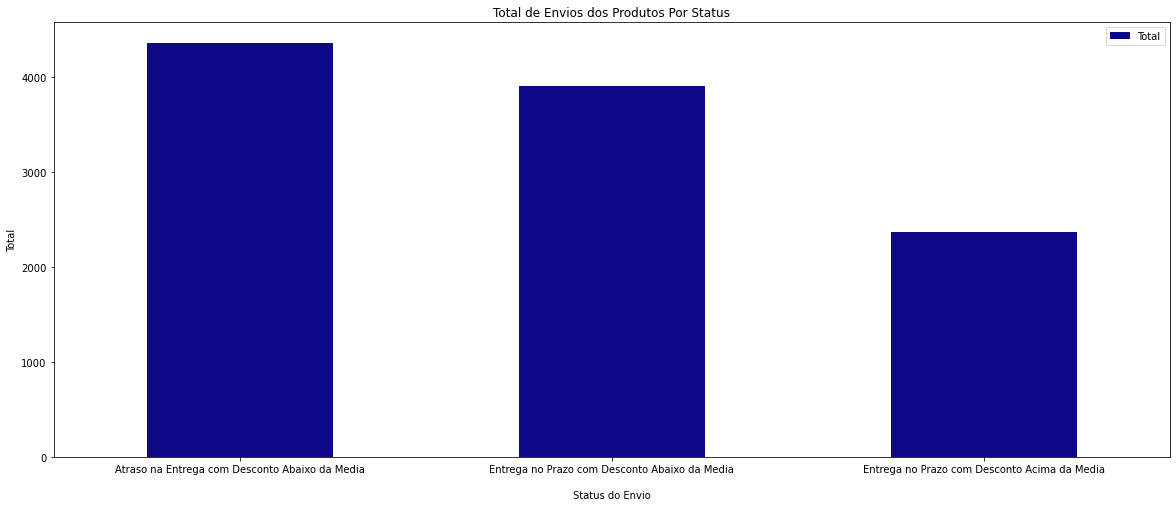

In [125]:
df_grupo3.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'plasma',
                figsize = (20,8))
plt.xticks(rotation = 0);

In [126]:
# Respondendo a pergunta: Há diferença na performance de envio dos produtos quando o produto recebe algum tipo de desconto?

# Observamos que existe uma relação entre desconto e a performance de envio, observa-se que a maior parte dos atrasos
#ocorre na faixa de descontos abaixo da média.

In [127]:
#Salvando o notebook:
df_eng.to_csv('df_eng.csv', sep= ',', encoding='utf-8')